In [54]:
'''Import basic modules'''
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

'''import visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

'''Plotly visualization .'''
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [55]:
'''Read in train and test data from csv files'''
train = pd.read_csv('categorial_train.csv')

#Preview

In [56]:
'''Train and test data at a glance.'''
bold('**Preview of train Data:**')
display(train.head(3))

**Preview of train Data:**

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0


In [57]:
'''Dimension of train and test data'''
bold('**Shape of our train data**')
print('Dimension of train:',train.shape)

**Shape of our train data**

Dimension of train: (21001, 25)


#Variable Description

In [58]:
'''Variable Description'''
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

In [59]:
bold('**Variable Description of  train Data:**')
description(train)

**Variable Description of  train Data:**

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,id,int64,0,21001,0,1,2
1,bin_0,int64,0,2,0,0,0
2,bin_1,int64,0,2,0,1,0
3,bin_2,int64,0,2,0,0,0
4,bin_3,object,0,2,T,T,F
5,bin_4,object,0,2,Y,Y,Y
6,nom_0,object,0,3,Green,Green,Blue
7,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
8,nom_2,object,0,6,Snake,Hamster,Lion
9,nom_3,object,0,6,Finland,Russia,Russia


#Target Feature: Balanced or Imbalanced

In [60]:
''' #1.Function for displaying bar labels in absolute scale.'''
def abs_bar_labels():
    font_size = 15
    plt.ylabel('Absolute Frequency', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([])
    #fig,ax = plt.subplots(1,2,figsize=[16,4])

    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')   


In [61]:
'''#2.Function for displaying bar lebels in relative scale.'''
def pct_bar_labels():
    font_size = 15
    plt.ylabel('Relative Frequency (%)', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([]) 
    
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')        


In [62]:
'''#3.Function to create a dataframe of absolute and relative frequency of each variable. And plot absolute and relative frequency.'''
def absolute_and_relative_freq(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2)
    # Was multiplied by 100 and rounded to 2 decimal points for percentage.
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    print('Absolute & Relative Frequency of',variable.name,':')
    display(df)
    
    # This portion plots absolute frequency with bar labeled.
    fig_size = (18,5)
    font_size = 15
    title_size = 18
    ax =  absolute_frequency.plot.bar(title = 'Absolute Frequency of %s' %variable.name, figsize = fig_size)
    ax.title.set_size(title_size)
    abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    
    # This portion plots relative frequency with bar labeled.
    ax1 = relative_frequency.plot.bar(title = 'Relative Frequency of %s' %variable.name, figsize = fig_size)
    ax1.title.set_size(title_size)
    pct_bar_labels() # Displays bar labels in relative scale.
    plt.show()

Absolute & Relative Frequency of target :


,Absolute Frequency,Relative Frequency(%)
0,14677,69.89
1,6324,30.11


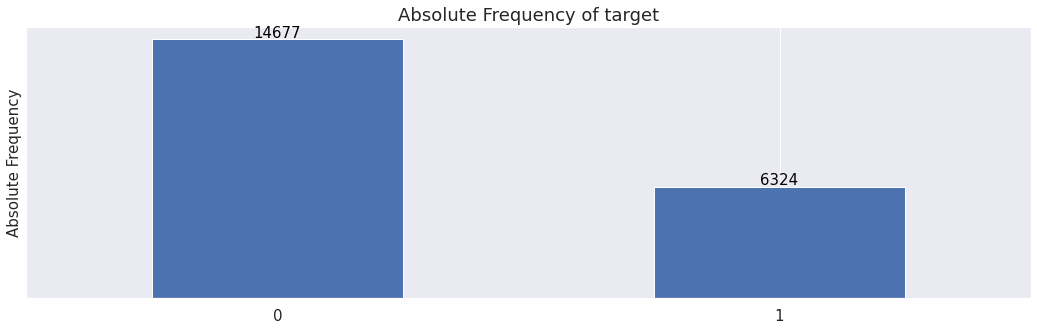

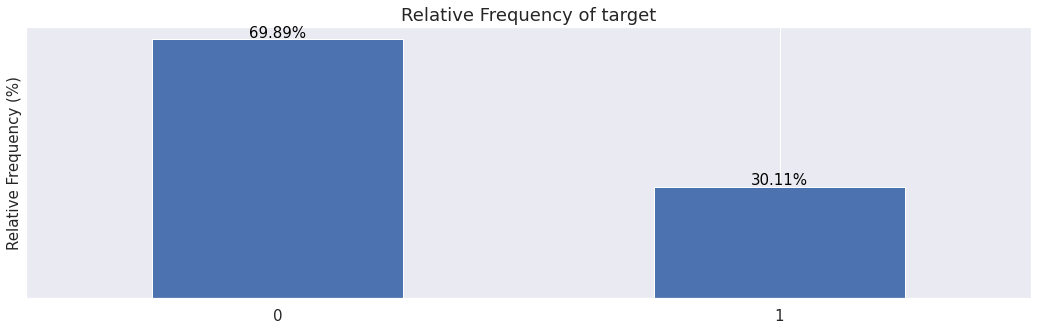

In [63]:
'''Plot and count the target variable in absolute and relative scale'''
absolute_and_relative_freq(train.target)

#Distribution of categorical variables.


In [64]:
'''#4.Create a function that relative frequency of Target variable by a categorical variable. And then plots the relative frequency of target by a categorical variable.'''
def crosstab(cat, cat_target, color):
    '''cat = categorical variable, cat_target = our target categorical variable.'''
    global ax1
    fig_size = (18, 5)
    title_size = 18
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    pct_cat_grouped_by_cat_target = round(pd.crosstab(index = cat, columns = cat_target, normalize = 'index')*100, 2)
       
    # Plot relative frequrncy of Target by a categorical variable
    ax1 = pct_cat_grouped_by_cat_target.plot.bar(color = color, title = 'Percentage Count of target by %s' %cat.name, figsize = fig_size)
    ax1.title.set_size(fontsize = title_size)
    pct_bar_labels()
    plt.xlabel(cat.name, fontsize = font_size)
    plt.show()


##Binary Features

**Percentage Count of target by bin_0:**

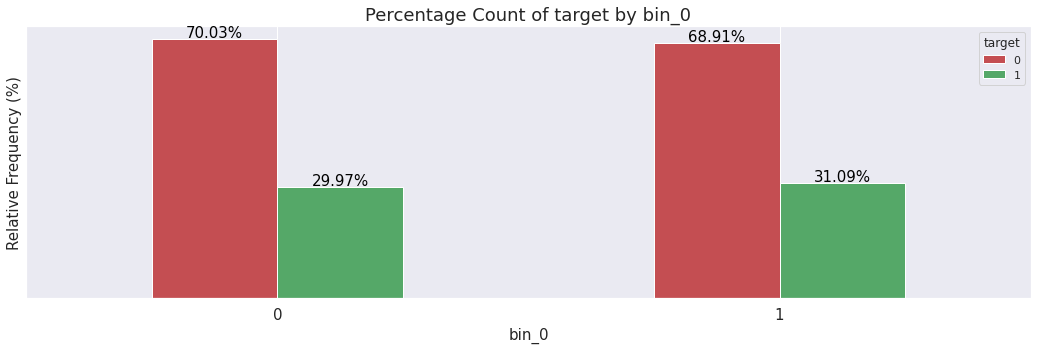

**Percentage Count of target by bin_1:**

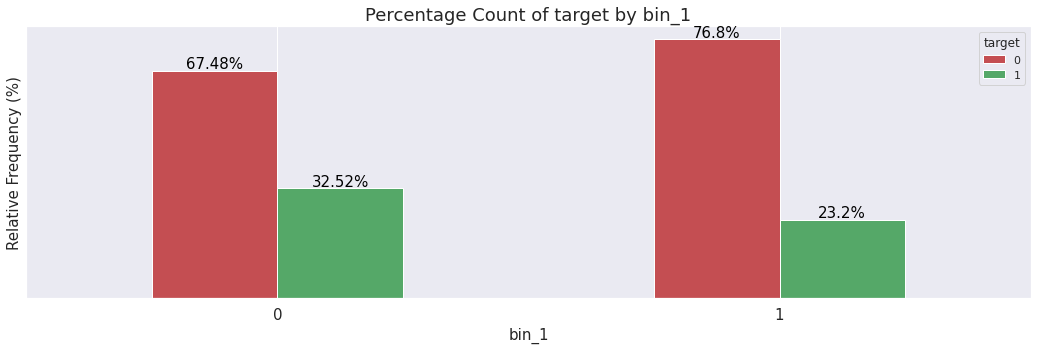

**Percentage Count of target by bin_2:**

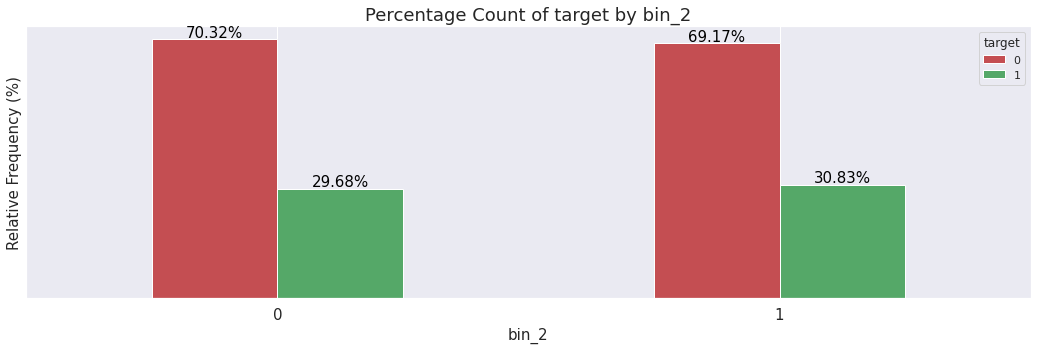

**Percentage Count of target by bin_3:**

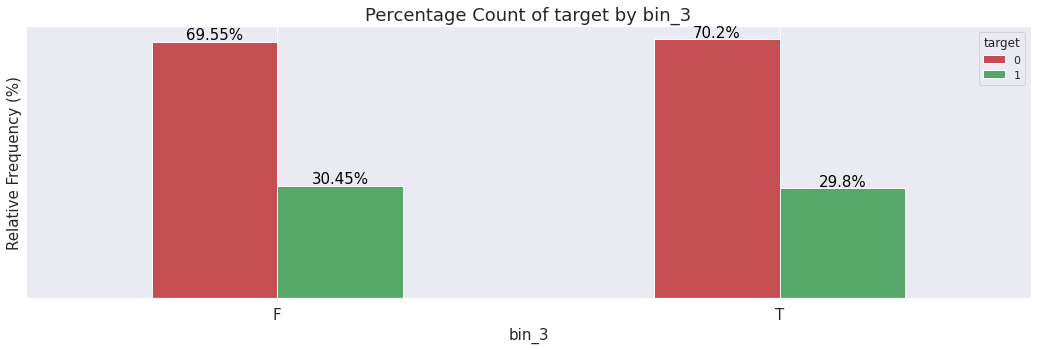

**Percentage Count of target by bin_4:**

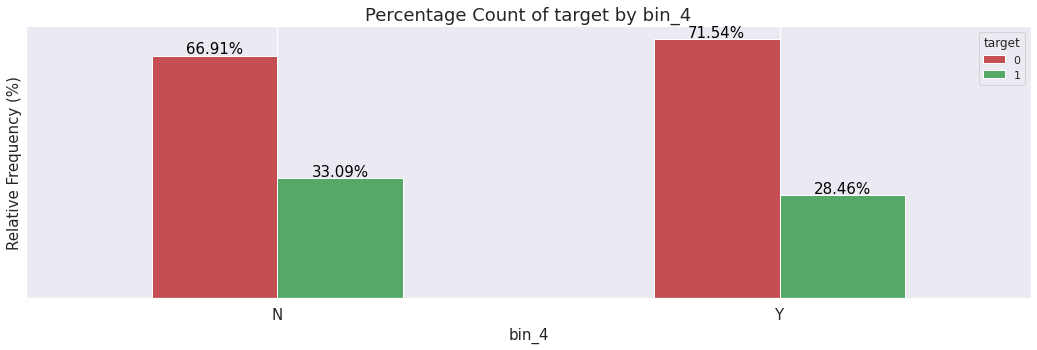

In [65]:
'''Plot the binary variables in relative scale'''

bold('**Percentage Count of target by bin_0:**')
crosstab(train.bin_0, train.target, color = ['r', 'g'])

bold('**Percentage Count of target by bin_1:**')
crosstab(train.bin_1, train.target, color = ['r', 'g'])

bold('**Percentage Count of target by bin_2:**')
crosstab(train.bin_2, train.target, color = ['r', 'g'])

bold('**Percentage Count of target by bin_3:**')
crosstab(train.bin_3, train.target, color = ['r', 'g'])

bold('**Percentage Count of target by bin_4:**')
crosstab(train.bin_4, train.target, color = ['r', 'g'])

##Nominal variables

**Percentage Count of target by nom_0:**

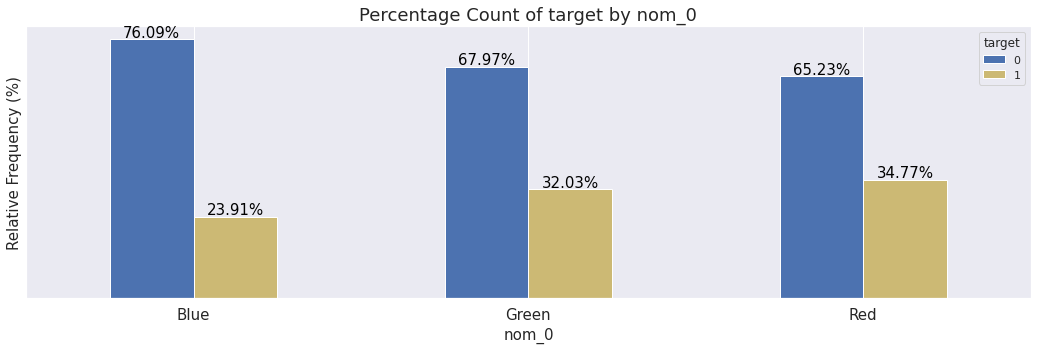

**Percentage Count of target by nom_1:**

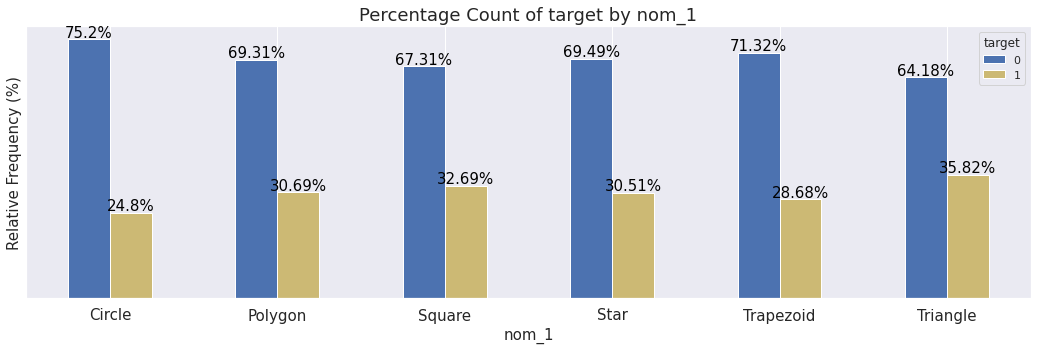

**Percentage Count of target by nom_2:**

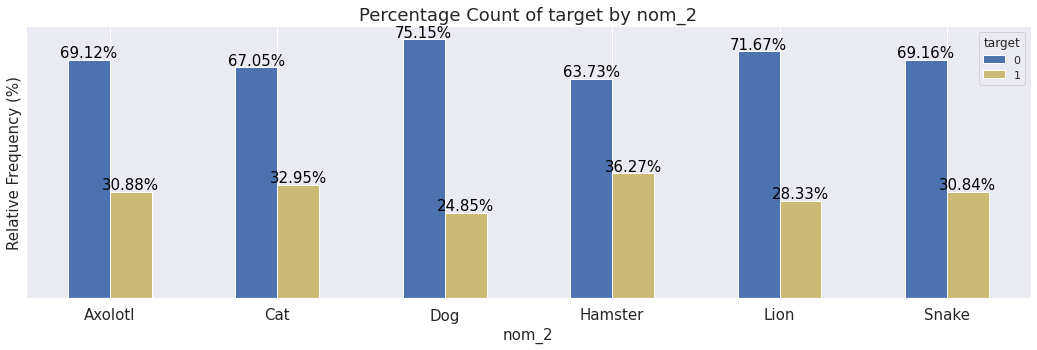

**Percentage Count of target by nom_3:**

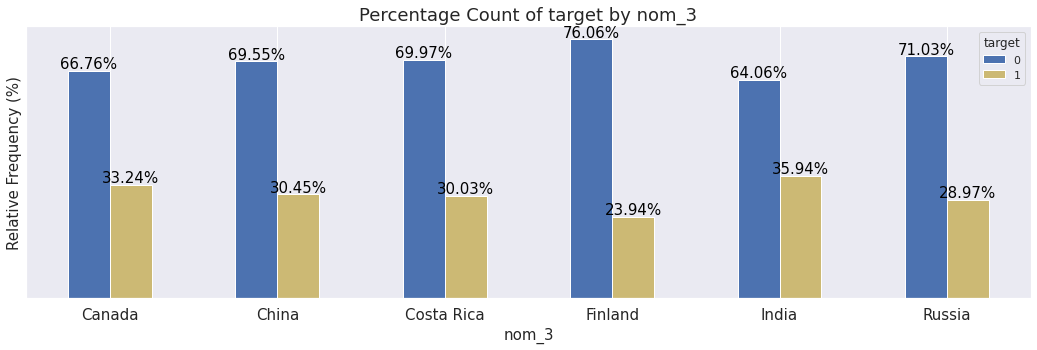

**Percentage Count of target by nom_4:**

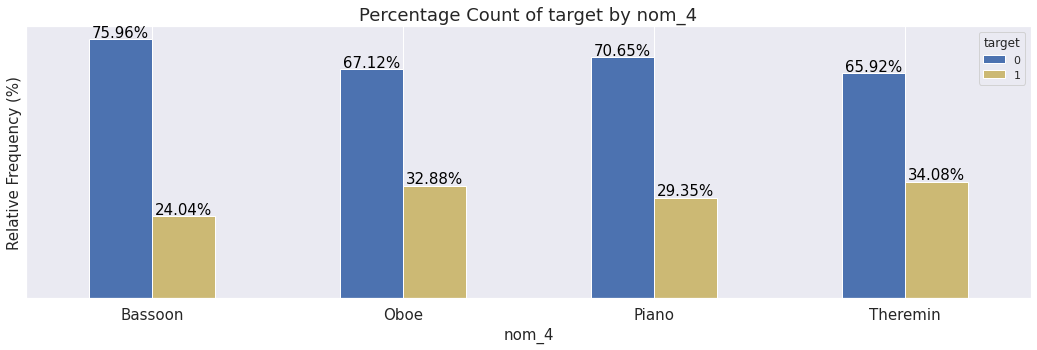

In [66]:
'''Plot the nominal variables in relative scale'''

bold('**Percentage Count of target by nom_0:**')
crosstab(train.nom_0, train.target, color = ['b', 'y'])

bold('**Percentage Count of target by nom_1:**')
crosstab(train.nom_1, train.target, color = ['b', 'y'])

bold('**Percentage Count of target by nom_2:**')
crosstab(train.nom_2, train.target, color = ['b', 'y'])

bold('**Percentage Count of target by nom_3:**')
crosstab(train.nom_3, train.target, color = ['b', 'y'])

bold('**Percentage Count of target by nom_4:**')
crosstab(train.nom_4, train.target, color = ['b', 'y'])

##Ordinal Variable

**Percentage Count of target by ord_0:**

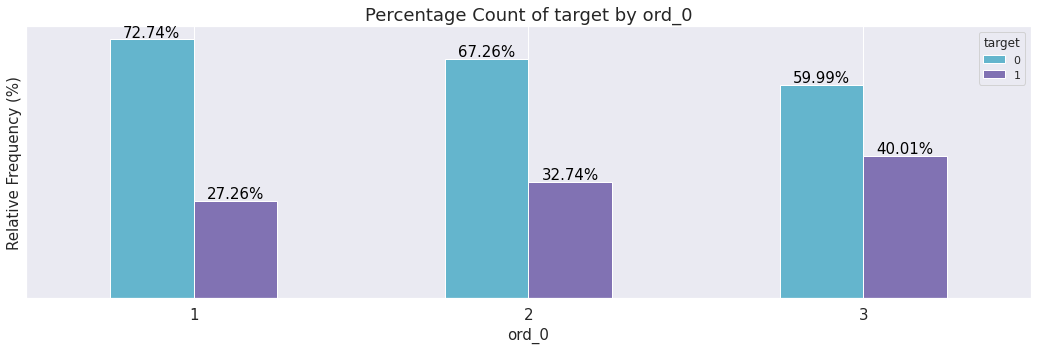

**Percentage Count of target by ord_1:**

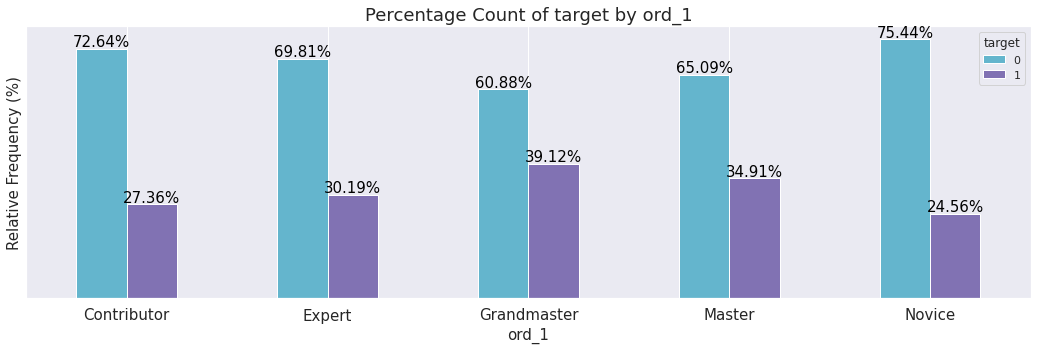

**Percentage Count of target by ord_2:**

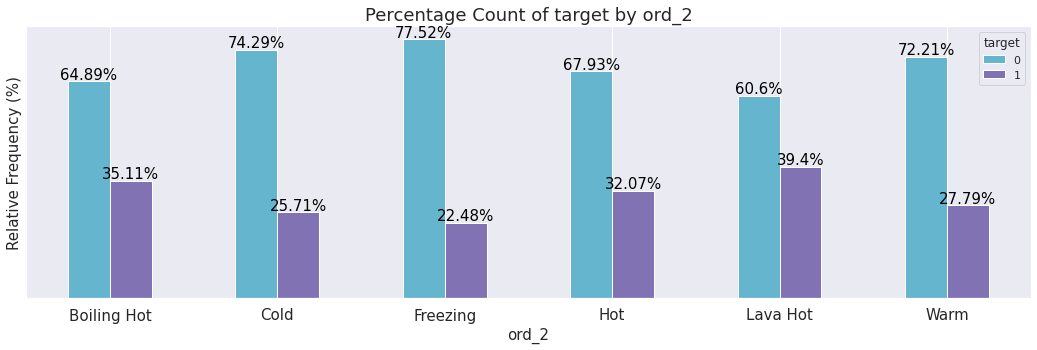

**Percentage Count of target by ord_3:**

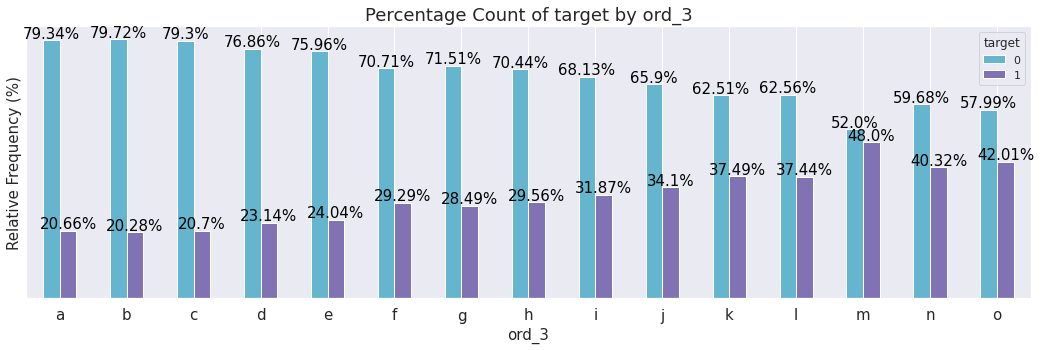

In [67]:
'''Plot the Ordinal variables in relative scale'''

bold('**Percentage Count of target by ord_0:**')
crosstab(train.ord_0, train.target, color = ['c', 'm'])

bold('**Percentage Count of target by ord_1:**')
crosstab(train.ord_1, train.target, color = ['c', 'm'])

bold('**Percentage Count of target by ord_2:**')
crosstab(train.ord_2, train.target, color = ['c', 'm'])

bold('**Percentage Count of target by ord_3:**')
crosstab(train.ord_3, train.target, color = ['c', 'm'])

In [68]:
def crosstab(cat, cat_target, color):
    '''cat = categorical variable, cat_target = our target categorical variable.'''
    global ax1
    fig_size = (28, 6)
    title_size = 18
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = cat, columns = cat_target)
    pct_cat_grouped_by_cat_target = round(pd.crosstab(index = cat, columns = cat_target, normalize = 'index')*100, 2)
       
    # Plot relative frequrncy of target by a categorical variable
    ax1 = pct_cat_grouped_by_cat_target.plot.bar(color = color, title = 'Percentage Count of target by %s' %cat.name, figsize = fig_size)
    ax1.title.set_size(fontsize = title_size)
    pct_bar_labels()
    plt.xlabel(cat.name, fontsize = font_size)
    plt.show()

**Percentage Count of target by ord_4:**

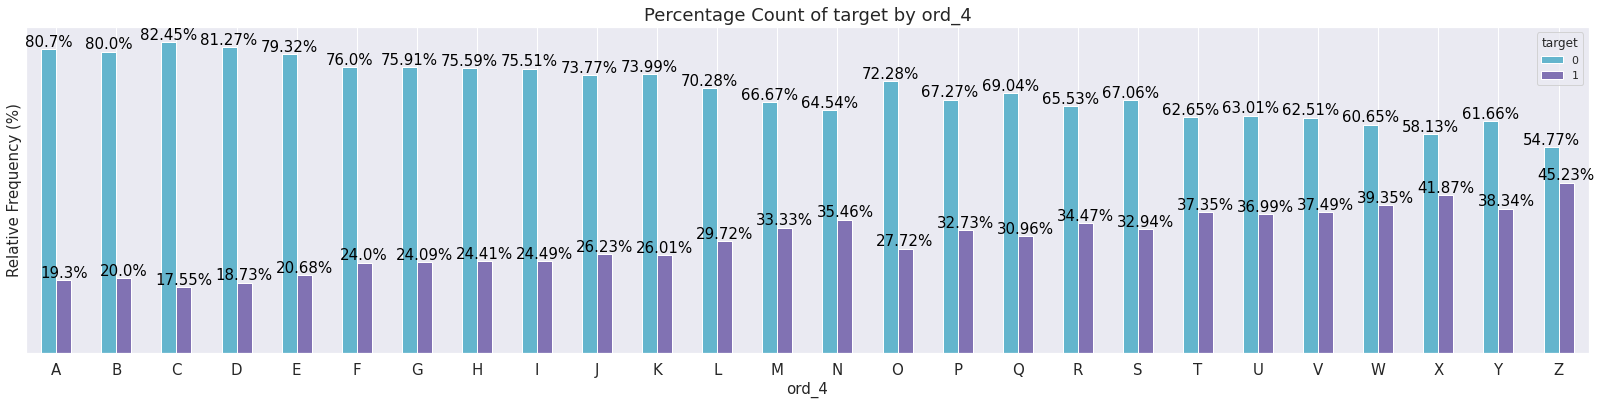

**Percentage Count of target by ord_5:**

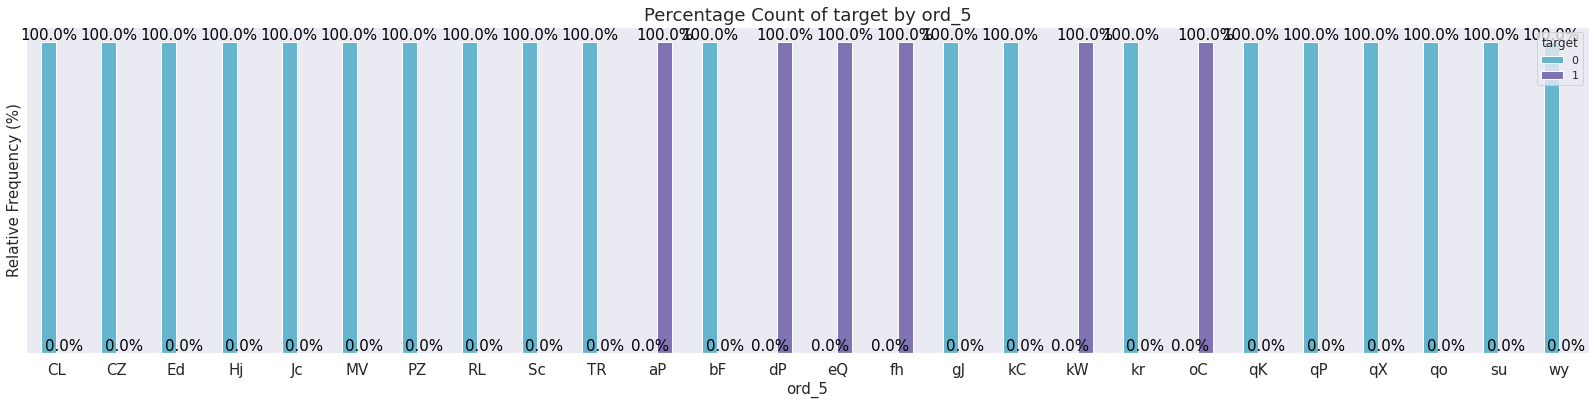

In [69]:
'''Plot the Ord_4 and ord_5 variables in relative scale'''
bold('**Percentage Count of target by ord_4:**')
crosstab(train.ord_4, train.target, color = ['c', 'm'])

bold('**Percentage Count of target by ord_5:**')
crosstab(train['ord_5'].head(26), train.target, color = ['c', 'm'])

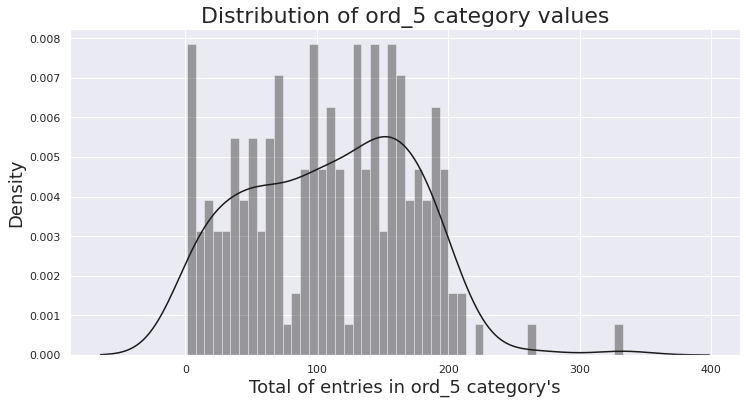

In [70]:
'''Distribution plot of ord_5'''
ord_5_count = train['ord_5'].value_counts().reset_index()['ord_5'].values
plt.figure(figsize=(12,6))

ax = sns.distplot(ord_5_count, bins= 50, color = 'k')
ax.set_title("Distribution of ord_5 category values", fontsize=22)
ax.set_xlabel("Total of entries in ord_5 category's", fontsize=18)
ax.set_ylabel("Density", fontsize=18)

plt.show()

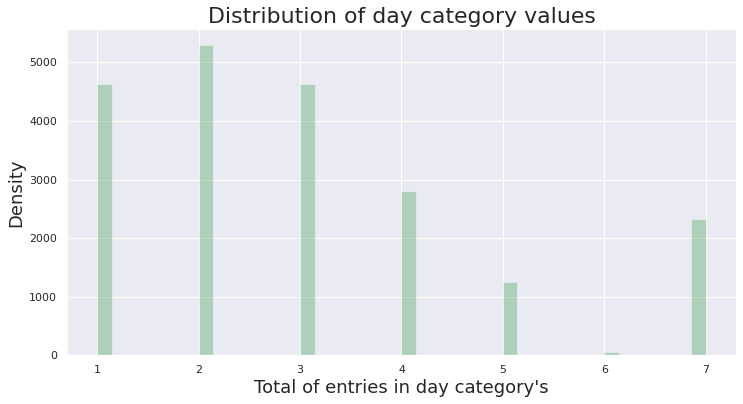

In [71]:
'''Distribution plot of day'''
plt.figure(figsize=(12,6))

ax = sns.distplot(train.day, color = 'g', kde = False)
ax.set_title("Distribution of day category values", fontsize=22)
ax.set_xlabel("Total of entries in day category's", fontsize=18)
ax.set_ylabel("Density", fontsize=18)

plt.show()

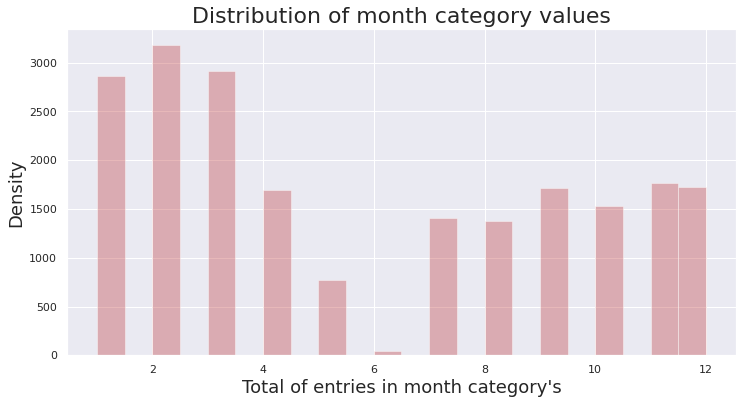

In [72]:
'''Distribution plot of month'''
plt.figure(figsize=(12,6))

ax = sns.distplot(train.month, color = 'r', kde = False)
ax.set_title("Distribution of month category values", fontsize=22)
ax.set_xlabel("Total of entries in month category's", fontsize=18)
ax.set_ylabel("Density", fontsize=18)

plt.show()

#Feature Engineering

##Binary Encoding - Binary Features

In [86]:
train = pd.read_csv('categorial_train.csv')

In [87]:
'''Binary encoding of bin_3 and bin_4 of train data and test data'''
train['bin_3'] = train['bin_3'].apply(lambda x: 0 if x == 'F' else 1)
train['bin_4'] = train['bin_4'].apply(lambda x: 0 if x == 'N' else 1)

In [88]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


##One Hot Encoding - Nominal Features

In [89]:
#'''Using sklearn bulit funtion for One Hot encoding'''
from sklearn.preprocessing import OneHotEncoder

for f in ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']:
    if train[f].dtype == 'object':
        ohe = OneHotEncoder()
        ohe.fit(train[f].values.reshape(-1, 1)) #fiting the data
        ohe_train = ohe.transform(train[f].values.reshape(-1, 1)) #transforming the data
        ohe_train = pd.DataFrame(ohe_train.toarray()) #convert sparse matrix to dataframe       
        

In [90]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,1,1,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,0,1,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,0,1,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,0,0,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [91]:
'''Now extract the nominal variables for one hot encoding of train and test data.'''
one_hot_train = pd.get_dummies(train[['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']], drop_first = True)


'''Droping the variables'''
train.drop(['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'], axis=1, inplace=True)

In [92]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,1,1,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,0,1,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,0,1,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,0,0,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


##Feature Hashing

In [93]:
train = pd.read_csv('categorial_train.csv')

In [94]:
#'''Using sklearn's FeatureHasher to encode High Cardinality Features'''
from sklearn.feature_extraction import FeatureHasher
for f in ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']:
    if train[f].dtype == 'object' or test[f].dtype == 'object':
        h = FeatureHasher(input_type='string', n_features=1000)
        h.fit(train[f].values) #fiting the data
        hash_train = h.transform(train[f].values) #transforming the data
        hash_train = pd.DataFrame(hash_train.toarray()) #convert sparse matrix to dataframe        

In [97]:
#'''Another hashing trick'''
# I got this solution from @kabure and @Giba
high_card = ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']
for col in high_card:
    train[f'hash_{col}'] = train[col].apply( lambda x: hash(str(x)) % 5000 )
    
#'''Droping the variables'''
train.drop(['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'], axis=1, inplace=True)


In [98]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,hash_nom_5,hash_nom_6,hash_nom_7,hash_nom_8,hash_nom_9
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,2,Grandmaster,Cold,h,D,kr,2,2,0,4225,4403,3422,4490,4424
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,1,Grandmaster,Hot,a,A,bF,7,8,0,4768,483,600,3477,2142
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,1,Expert,Lava Hot,h,R,Jc,7,2,0,748,1239,1150,2812,3349
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1,3805,2572,4346,3169,1955
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,1,Grandmaster,Freezing,a,R,qP,7,8,0,4780,3767,4453,2168,1


##Encoding with the Frequency

In [99]:
train = pd.read_csv('categorial_train.csv')

In [102]:
high_card = ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'] 
for col in high_card:
    enc_nom_1 = (train.groupby(col).size()) / len(train)
    train[f'freq_{col}'] = train[col].apply(lambda x : enc_nom_1[x])
    

'''Droping the variables'''
train.drop(['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'], axis=1, inplace=True)


In [103]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,freq_nom_5,freq_nom_6,freq_nom_7,freq_nom_8,freq_nom_9
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,2,Grandmaster,Cold,h,D,kr,2,2,0,0.008428,0.003857,0.001095,0.000762,0.000095
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,1,Grandmaster,Hot,a,A,bF,7,8,0,0.002809,0.002952,0.000619,0.000429,0.000095
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,1,Expert,Lava Hot,h,R,Jc,7,2,0,0.008571,0.003524,0.001952,0.001238,0.000143
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1,0.003524,0.003857,0.001667,0.000286,0.000238
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,1,Grandmaster,Freezing,a,R,qP,7,8,0,0.006000,0.003619,0.001524,0.000714,0.000095


##Label Encoding

In [104]:
train = pd.read_csv('categorial_train.csv')

In [105]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [106]:
from sklearn.preprocessing import LabelEncoder

for f in ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']:
    if train[f].dtype=='object' or test[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(train[f].values) + list(test[f].values))
        train[f'le_{f}'] = lbl.transform(list(train[f].values))


In [107]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,le_nom_5,le_nom_6,le_nom_7,le_nom_8,le_nom_9
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0,78,120,490,1688,2163
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0,159,510,259,652,11529
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0,44,14,765,1934,8008
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1,209,165,1120,631,6000
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0,90,61,34,1762,8160


##Ordinal Encoding

In [108]:
"""let's begin the manual process of ordinal encoding."""
# ordinal encoding on train data
train.ord_1.replace(to_replace = ['Novice', 'Contributor','Expert', 'Master', 'Grandmaster'],
                         value = [0, 1, 2, 3, 4], inplace = True)

train.ord_2.replace(to_replace = ['Freezing', 'Cold', 'Warm', 'Hot','Boiling Hot', 'Lava Hot'],
                         value = [0, 1, 2, 3, 4, 5], inplace = True)

train.ord_3.replace(to_replace = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h', 'i', 'j', 'k', 'l', 'm', 'n', 'o'],
                         value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], inplace = True)

train.ord_4.replace(to_replace = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','J', 'K', 'L', 'M', 'N', 'O', 
                                     'P', 'Q', 'R','S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
                         value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 
                                  22, 23, 24, 25], inplace = True)

# ordinal encoding on test data
test.ord_1.replace(to_replace = ['Novice', 'Contributor','Expert', 'Master', 'Grandmaster'],
                         value = [0, 1, 2, 3, 4], inplace = True)

test.ord_2.replace(to_replace = ['Freezing', 'Cold', 'Warm', 'Hot','Boiling Hot', 'Lava Hot'],
                         value = [0, 1, 2, 3, 4, 5], inplace = True)

test.ord_3.replace(to_replace = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h', 'i', 'j', 'k', 'l', 'm', 'n', 'o'],
                         value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], inplace = True)

test.ord_4.replace(to_replace = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','J', 'K', 'L', 'M', 'N', 'O', 
                                       'P', 'Q', 'R','S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
                         value = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 
                                  22, 23, 24, 25], inplace = True)

In [109]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,le_nom_5,le_nom_6,le_nom_7,le_nom_8,le_nom_9
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,4,1,7,3,kr,2,2,0,78,120,490,1688,2163
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,4,3,0,0,bF,7,8,0,159,510,259,652,11529
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,2,5,7,17,Jc,7,2,0,44,14,765,1934,8008
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,4,4,8,3,kW,2,1,1,209,165,1120,631,6000
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,4,0,0,17,qP,7,8,0,90,61,34,1762,8160


In [115]:
train = pd.read_csv('categorial_train.csv')

In [116]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [117]:
#'''Using sklearn's OrdinalEncoder to encode High Cardinality Features'''
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories='auto')
oe.fit(train.ord_5.values.reshape(-1, 1))
train.ord_5 = oe.transform(train.ord_5.values.reshape(-1, 1))


In [118]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,136.0,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,93.0,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,31.0,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,134.0,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,158.0,7,8,0


In [120]:
'''Simply sort their values by string of ord_5'''

ord_5 = sorted(list(set(train['ord_5'].values)))
ord_5 = dict(zip(ord_5, range(len(ord_5))))
train.loc[:, 'ord_5'] = train['ord_5'].apply(lambda x: ord_5[x]).astype(float)

In [121]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,136.0,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,93.0,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,31.0,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,134.0,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,158.0,7,8,0


##Encoding cyclic features

In [122]:
train = pd.read_csv('categorial_train.csv')

In [123]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [124]:
'''Transfer the cyclical features into two dimensional sin-cos features'''

def cyclical_encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

train = cyclical_encode(train, 'day', 7)


train = cyclical_encode(train, 'month', 12)

'''Droping the variables'''
train.drop(['day', 'month'], axis=1, inplace=True)

In [125]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,target,day_sin,day_cos,month_sin,month_cos
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,0,9.749279e-01,-0.222521,0.866025,0.500000
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,0,-2.449294e-16,1.000000,-0.866025,-0.500000
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,0,-2.449294e-16,1.000000,0.866025,0.500000
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,1,9.749279e-01,-0.222521,0.500000,0.866025
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,0,-2.449294e-16,1.000000,-0.866025,-0.500000
